## Riemannian Gradient Functions for Sphere

In [ ]:
using Plots, LaTeXStrings, Random, LinearAlgebra, Convex, SCS

In [43]:
function RGD(x0,Retract,RGrad;tol=1e-7,Nmax=10000,t=0.05,ObjFun=empty)
    xk = x0
    x = zeros(length(x0),Nmax+1)
    x[:,1] = xk[:]
    if ObjFun == empty
        for k in 2:Nmax+1
            sk = -t*RGrad(xk)
            xk1 = Retract(sk,xk)
            x[:,k] = xk1[:]
            err = norm(xk1-xk,2)/norm(xk,2)
            if err <= tol
                return x[:,1:k]
            end
            xk = xk1
        end
    else
        # line search
        for k in 2:Nmax+1
            t = 0.5
            grdfx = RGrad(xk)
            fun(α) = ObjFun(Retract(-α*grdfx,xk))
            fx = ObjFun(xk)
            t = linesearch(t,fun,fx,grdfx)
            sk = -t*grdfx
            xk1 = Retract(sk,xk)
            x[:,k] = xk1[:]
            err = norm(xk1-xk,2)/norm(xk,2)
            if err <= tol
                return x[:,1:k]
            end
            xk = xk1
        end
    end
    return x
end
function SphereRGrad(x,Gradf)
    n = length(x)
    return (I-x*x')*Gradf(x)
end
function SphereRet(v,x)
    return (x+v)./norm(x+v)
end
function linesearch(t,fun,fx,grdfx)
    count = 1
    while fx-fun(t)<1e-4*t*norm(grdfx,2)^2
        t *= 0.7
        if count == 100
            return t
        end
        count += 1
    end
    return t
end

linesearch (generic function with 1 method)

## Setup Objective Function, Gradients, and x0

In [84]:
Random.seed!(12)
A = rand(10,10)
A = 1/2*(A+A')
Objf(x) = 1/2*dot(x,A*x)
df(x) = A*x
RGrad(x) = SphereRGrad(x,df)
x0 = rand(10,1)
tolerance = 1e-10;

## Riemannian Gradient Descent - Constant Step Size

In [85]:
xRGD = RGD(x0,SphereRet,RGrad,tol=tolerance);

## RGD - Line Search

In [86]:
xRGDls = RGD(x0,SphereRet,RGrad,tol=tolerance,ObjFun=Objf);

## RGD - Euclidean Gradient

In [87]:
xEG = RGD(x0,SphereRet,df,tol=tolerance);

## RGD - Euclidean Gradient Line Search

In [88]:
xEGls = RGD(x0,SphereRet,df,tol=tolerance,ObjFun=Objf);

In [89]:
fRGD = zeros(size(xRGD,2),1)
reltol = zeros(size(xRGD,2)-1,1)
fRGDls = zeros(size(xRGDls,2),1)
reltolls = zeros(size(xRGDls,2)-1,1)
fEG = zeros(size(xEG,2),1)
reltolEG = zeros(size(xEG,2)-1,1)
fEGls = zeros(size(xEGls,2),1)
reltolEGls = zeros(size(xEGls,2)-1,1)

for k in 1:length(fRGD)
    fRGD[k] = Objf(xRGD[:,k])
end
for k in 1:length(reltol)
    reltol[k] = norm(xRGD[:,k+1]-xRGD[:,k])/norm(xRGD[:,k])
end

for k in 1:length(fRGDls)
    fRGDls[k] = Objf(xRGDls[:,k])
end
for k in 1:length(reltolls)
    reltolls[k] = norm(xRGDls[:,k+1]-xRGDls[:,k])/norm(xRGDls[:,k])
end

for k in 1:length(fEG)
    fEG[k] = Objf(xEG[:,k])
end
for k in 1:length(reltolEG)
    reltolEG[k] = norm(xEG[:,k+1]-xEG[:,k])/norm(xEG[:,k])
end

for k in 1:length(fEGls)
    fEGls[k] = Objf(xEGls[:,k])
end
for k in 1:length(reltolEGls)
    reltolEGls[k] = norm(xEGls[:,k+1]-xEGls[:,k])/norm(xEGls[:,k])
end

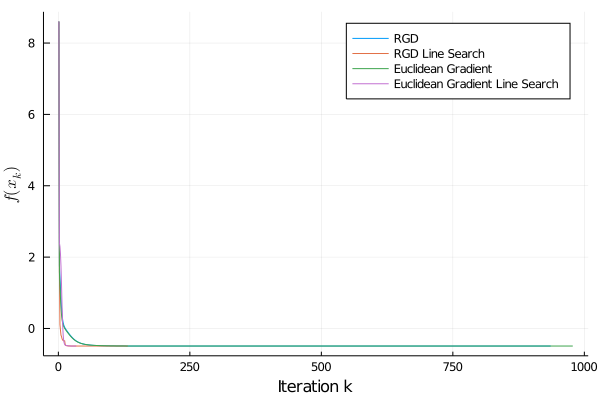

In [90]:
plot(fRGD,label="RGD",xlabel="Iteration k",ylabel=L"f(x_k)")
plot!(fRGDls,label="RGD Line Search")
plot!(fEG,label="Euclidean Gradient")
plot!(fEGls,label="Euclidean Gradient Line Search")

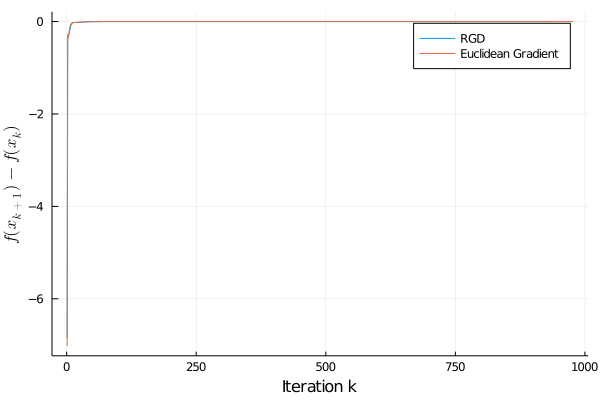

In [91]:
plot(fRGD[2:end]-fRGD[1:end-1],label="RGD",xlabel="Iteration k",ylabel=L"f(x_{k+1})-f(x_k)")
plot!(fEG[2:end]-fEG[1:end-1],label="Euclidean Gradient")

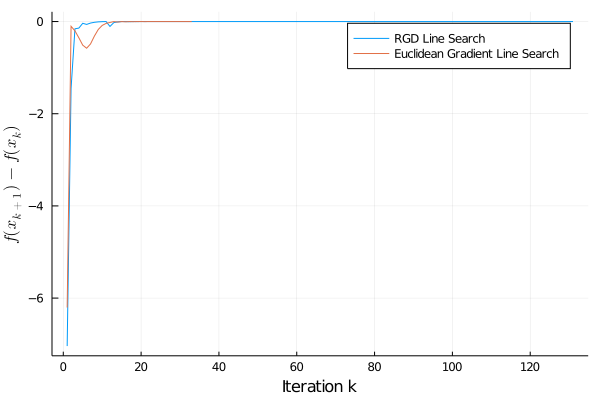

In [92]:
plot(fRGDls[2:end]-fRGDls[1:end-1],label="RGD Line Search",xlabel="Iteration k",ylabel=L"f(x_{k+1})-f(x_k)")
plot!(fEGls[2:end]-fEGls[1:end-1],label="Euclidean Gradient Line Search")

Can see this is a descent algorithm because $f(x_{k+1}) \leq f(x_k)$.

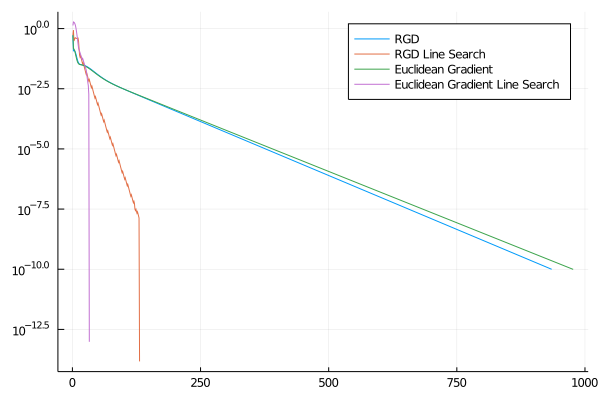

In [93]:
plot(reltol,yaxis=:log,label="RGD")
plot!(reltolls[reltolls.!=0],yaxis=:log,label="RGD Line Search")
plot!(reltolEG,yaxis=:log,label="Euclidean Gradient")
plot!(reltolEGls,yaxis=:log,label="Euclidean Gradient Line Search")

Relative error used for stopping condition in RGD.

In [94]:
eigen(A)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
10-element Array{Float64,1}:
 -0.9860908160888683
 -0.5778521899611386
 -0.5053989076508021
 -0.08569881036794358
 -0.003185691883852204
  0.21721659666444804
  0.44712873390168417
  0.5800796724097038
  0.9133755152497581
  5.3398487399978
vectors:
10×10 Array{Float64,2}:
  0.406654    0.609265  -0.227308   …   0.201406     0.258067   -0.325765
 -0.552903   -0.268958  -0.514638       0.419094    -0.0672597  -0.324402
 -0.36191     0.104391   0.0736411     -0.455561     0.20859    -0.356738
 -0.127969    0.228372  -0.232876      -0.610977    -0.340072   -0.268831
  0.189045   -0.332101   0.212167      -0.142722     0.326807   -0.301459
  0.0634872  -0.338359   0.225476   …  -0.105799     0.281759   -0.339643
 -0.302617    0.450138   0.445243       0.317996    -0.0774897  -0.314205
  0.211414   -0.176983   0.371397       0.135805    -0.694774   -0.328325
  0.451196   -0.147456  -0.434303      -0.00464397  -0.172182   -0.32

In [95]:
[Objf(xRGD[:,end])*2 Objf(xRGDls[:,end])*2 Objf(xEG[:,end])*2 Objf(xEGls[:,end])*2]

1×4 Array{Float64,2}:
 -0.986091  -0.986091  -0.986091  -0.985875

In [96]:
[xRGD[:,end] xRGDls[:,end] xEG[:,end] xEGls[:,end]]

10×4 Array{Float64,2}:
 -0.406654   -0.406654   -0.406654   -0.393264
  0.552903    0.552903    0.552903    0.545248
  0.36191     0.36191     0.36191     0.364366
  0.127969    0.127969    0.127969    0.132485
 -0.189045   -0.189045   -0.189045   -0.195975
 -0.0634872  -0.0634872  -0.0634872  -0.0706308
  0.302617    0.302617    0.302617    0.313917
 -0.211414   -0.211414   -0.211414   -0.214391
 -0.451196   -0.451196   -0.451196   -0.455683
 -0.0442414  -0.0442414  -0.0442414  -0.0467274

We can see that the optimal solution found is indeed the eigenvector corresponding to the most negative eigenvalue of $A$.

# Semidefinite Program

## Manifold Optimization

In [13]:
function SDPRGrad(Y,Gradf)
    grdfy = Gradf(Y)
    return grdfy - (grdfy[:]'*Y[:])*Y
end
function SDPRet(V,Y)
    return (Y+V)./norm(Y+V,2)
end

SDPRet (generic function with 1 method)

In [97]:
d = 10
Random.seed!(256)
C = rand(d,d)
Y0 = rand(d,d)
Y0 = Y0./norm(Y0,2)
tolerance = 1e-10;

In [98]:
function SDPObjFun(Y)
    return tr(Y'*C'*Y)
end
function SDPdFun(Y)
    return (Y'*(C+C'))
end
Rgrad(Y) = SDPRGrad(Y,SDPdFun)

Rgrad (generic function with 1 method)

In [99]:
YRGD = RGD(Y0,SDPRet,Rgrad,tol=tolerance,t=0.001)
YRGDls = RGD(Y0,SDPRet,Rgrad,tol=tolerance,ObjFun=SDPObjFun);

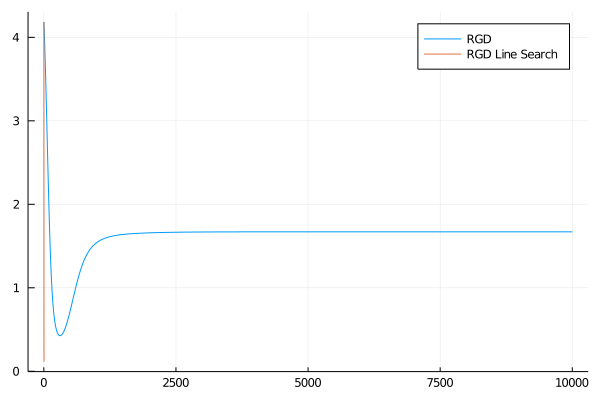

In [100]:
fRGD = zeros(size(YRGD,2),1)
reltol = zeros(size(YRGD,2)-1,1)
fRGDls = zeros(size(YRGDls,2),1)
reltolls = zeros(size(YRGDls,2)-1,1)

for k in 1:length(fRGD)
    fRGD[k] = SDPObjFun(reshape(YRGD[:,k],d,d))
end
for k in 1:length(reltol)
    reltol[k] = norm(YRGD[:,k+1]-YRGD[:,k])/norm(YRGD[:,k])
end

for k in 1:length(fRGDls)
    fRGDls[k] = SDPObjFun(reshape(YRGDls[:,k],d,d))
end
for k in 1:length(reltolls)
    reltolls[k] = norm(YRGDls[:,k+1]-YRGDls[:,k])/norm(YRGDls[:,k])
end

plot(fRGD,label="RGD")
plot!(fRGDls,label="RGD Line Search")

## Convex Optimization

In [101]:
x = Variable(d,d)
p = minimize(tr(C'*x))
p.constraints += (x in :SDP)
p.constraints += (tr(x) == 1)
solver = () -> SCS.Optimizer(verbose=0)
solve!(p,solver)

In [102]:
p.optval

-1.165791152162343

In [103]:
tr(x.value)

0.9999957740022031